In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab
import mlflow

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler



from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier



In [5]:
csv_train = pd.read_csv('train_ver2.csv')

csv_train.columns

C:\Users\Administrador\AppData\Local\Temp\ipykernel_22052\560558549.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_train = pd.read_csv('train_ver2.csv')


Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

<h1>ML Flow Stuff</h1>

In [16]:
expermient_name = 'testing_NN'

dict_values = {
    'mse':0,
    'r2':0,
    'rmse':0
}


def load_create_experiment():
    if mlflow.get_experiment_by_name(expermient_name):
        return mlflow.get_experiment_by_name(expermient_name)
    return mlflow.create_experiment(expermient_name)
    
current_experiment = load_create_experiment()
mlflow.set_experiment(expermient_name)

<Experiment: artifact_location='file:///C:/Users/Administrador/Desktop/DataMining/segundo_parcial/mlruns/6', creation_time=1672232166932, experiment_id='6', last_update_time=1672232166932, lifecycle_stage='active', name='testing_NN', tags={}>

Loggin Params

In [ ]:

#columns_to_drop = ['Model']
#mlflow.log_param('drop_columns',columns_to_drop) 1th Param name, value


Set Tags

In [ ]:
#mlflow.set_tag('Summary',summary)


Loggin Metrics

In [ ]:
#mlflow.log_metrics(dict_values)


Save Picture

In [ ]:
#plt.savefig('plotname.png')
#mlflow.log_artifact('plotname.png')
#plt.show()

<h2>Analisis Univariado</h2>

In [4]:
column_to_analize = 'renta'
mlflow.log_param('Column',column_to_analize)


'renta'

Bar plot

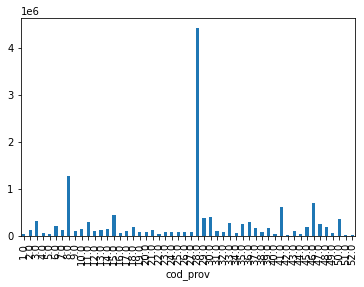

In [14]:
img_name = column_to_analize + '_bar_plot.png'
fig = csv_train.groupby(column_to_analize).size().plot(kind='bar').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

Box Plot

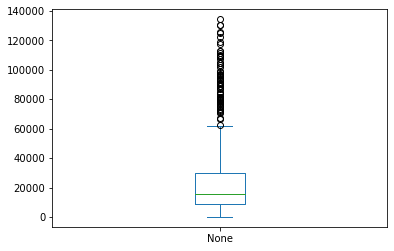

In [29]:
img_name = column_to_analize + '_box_plot.png'
fig = csv_train.groupby(column_to_analize).size().plot(kind='box').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

Hist Plot


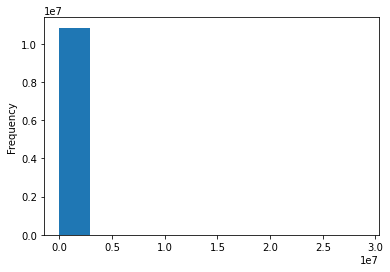

In [6]:
img_name = column_to_analize + '_hist_plot.png'
fig = csv_train[column_to_analize].plot(kind='hist').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

Comment Column

In [31]:
comment ='Realizar analisis mas a fondo'
mlflow.set_tag('Comentario',comment)


<h2>Variables Dummies<h2>

In [26]:
column_dummy = 'segmento'
var_dummies = pd.get_dummies(csv_train[column_dummy])
csv_train = csv_train.drop(columns=[column_dummy])

csv_train[var_dummies.columns] = var_dummies

In [27]:
mlflow.set_tag('Var dummies',var_dummies.columns)
print(var_dummies.columns)


Index(['01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO'], dtype='object')


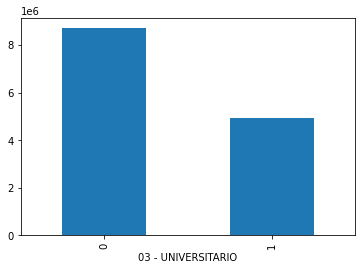

In [30]:
feature_dummy = '03 - UNIVERSITARIO'
img_name = column_dummy + '_' + feature_dummy + '_bar_plot.png'
fig = var_dummies.groupby(feature_dummy).size().plot(kind='bar').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

End MlFlow Run

In [20]:
mlflow.end_run()

Describe DataSet

In [8]:
csv_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ncodpers,13647309.0,834904.211501,431565.025784,15889.00,452813.00,931893.0,1199286.00,1553689.00
ind_nuevo,13619575.0,0.059562,0.236673,0.00,0.00,0.0,0.00,1.00
indrel,13619575.0,1.178399,4.177469,1.00,1.00,1.0,1.00,99.00
tipodom,13619574.0,1.000000,0.000000,1.00,1.00,1.0,1.00,1.00
cod_prov,13553718.0,26.571470,12.784017,1.00,15.00,28.0,35.00,52.00
ind_actividad_cliente,13619575.0,0.457811,0.498217,0.00,0.00,0.0,1.00,1.00
renta,10852934.0,134254.318238,230620.238822,1202.73,68710.98,101850.0,155955.96,28894395.51
ind_ahor_fin_ult1,13647309.0,0.000102,0.010113,0.00,0.00,0.0,0.00,1.00
ind_aval_fin_ult1,13647309.0,0.000023,0.004812,0.00,0.00,0.0,0.00,1.00
ind_cco_fin_ult1,13647309.0,0.655484,0.475210,0.00,0.00,1.0,1.00,1.00


In [12]:
nullValues = csv_train.isnull().sum()
mlflow.set_tag('Null values on DataSet',nullValues)

In [7]:
df_without_nulls = csv_train[csv_train.renta.notnull()]

In [13]:
column_to_analize = 'age'
mlflow.log_param('Column',column_to_analize)


'age'

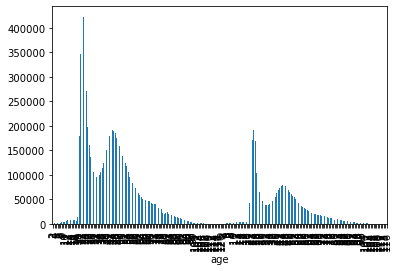

In [14]:
img_name = column_to_analize + '_bar_plot.png'
fig = df_without_nulls.groupby(column_to_analize).size().plot(kind='bar').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

Stadardization

In [14]:
columns_to_drop = ['canal_entrada','fecha_dato','ncodpers','indresi','indext','ind_empleado','pais_residencia','fecha_alta','indrel','ult_fec_cli_1t','indrel_1mes','conyuemp','indfall','tipodom','nomprov','tiprel_1mes']
df_clean = pd.DataFrame(df_without_nulls.drop(columns=columns_to_drop))

In [78]:
mlflow.log_param('Drop Columns',columns_to_drop)

['canal_entrada',
 'fecha_dato',
 'ncodpers',
 'indresi',
 'indext',
 'ind_empleado',
 'pais_residencia',
 'fecha_alta',
 'indrel',
 'ult_fec_cli_1t',
 'indrel_1mes',
 'conyuemp',
 'indfall',
 'tipodom',
 'nomprov',
 'tiprel_1mes']

In [19]:
df_clean.shape

(10852934, 32)

In [20]:
df_clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sexo,10852898,2,V,5943966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10852934.0,232.0,23.0,422497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ind_nuevo,10852934.0,NaN,NaN,NaN,0.027092,0.162352,0.0,0.0,0.0,0.0,1.0
antiguedad,10852934.0,506.0,12.0,106876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_prov,10852726.0,NaN,NaN,NaN,26.480537,12.498091,1.0,15.0,28.0,33.0,52.0
ind_actividad_cliente,10852934.0,NaN,NaN,NaN,0.469303,0.499057,0.0,0.0,0.0,1.0,1.0
renta,10852934.0,NaN,NaN,NaN,134254.318238,230620.238822,1202.73,68710.98,101850.0,155955.96,28894395.51
segmento,10796101,3,02 - PARTICULARES,6522878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ind_ahor_fin_ult1,10852934.0,NaN,NaN,NaN,0.000115,0.010727,0.0,0.0,0.0,0.0,1.0
ind_aval_fin_ult1,10852934.0,NaN,NaN,NaN,0.000027,0.005205,0.0,0.0,0.0,0.0,1.0


Change char and string values to binary or number values

In [15]:
df_clean['sexo_binario'] = df_clean['sexo'].map({'H': 1, 'V': 0}) 
df_clean['segmento_enum'] = df_clean['segmento'].map({'01 - TOP': 1, '02 - PARTICULARES': 2, '03 - UNIVERSITARIO':3}) 


In [19]:
#Drop base columns
df_clean = df_clean.drop(columns=['sexo','segmento'])

In [28]:
df_clean.shape

(10852934, 33)

In [ ]:
df_clean.to_csv('df_clean.csv')

In [3]:
df_clean = pd.read_csv('clean_data_def.csv')

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

In [5]:
outputs = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

y = df_clean[outputs]
x = df_clean.drop(columns=outputs)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [7]:
y_train_unidemesional = y_train.apply(lambda x: x.argmax(), axis=1).values


In [8]:
y_train_unidemesional

array([ 2, 15,  2, ...,  2,  2,  0], dtype=int64)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(y_train_unidemesional.size)

(7271465, 9)
(7271465, 24)
7271465


In [10]:
clf = HistGradientBoostingClassifier().fit(X_train, y_train_unidemesional)


In [11]:
clf.score(X_train, y_train_unidemesional)


0.728867154005417

-12.194506665068772

In [79]:
mlflow.log_param('Model','Hist Gradient Boosting Classifier')
mlflow.log_param('Score',clf.score(X_train, y_train_unidemesional))


0.7242338373353925

Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)


In [61]:
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [70]:
y_test_unidemesional = y_test.apply(lambda x: x.argmax(), axis=1).values


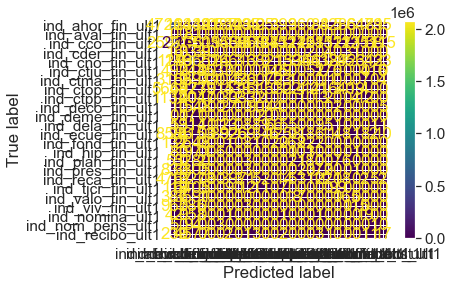

<Figure size 720x720 with 0 Axes>

In [76]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics



matrix = confusion_matrix(y_test_unidemesional, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = y_test.columns)

cm_display.plot()
plt.figure(figsize=(10, 10))
plt.show()




In [80]:
mlflow.log_artifact('conf_matrix_entire_dataset.png')


In [81]:
mlflow.set_tag('Comment','Se eliminaron los valores nulos de rentas, y se realizaron tratamiento con las variables de tipo char y string')

In [22]:
#df_clean.to_csv('clean_data_def.csv')

(10852934, 32)

In [20]:
csv_clean = pd.read_csv('clean_data_def.csv')

In [24]:
csv_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10852934.0,6.691840e+06,3.931321e+06,0.00,3292875.25,6578581.5,10063634.50,13647307.00
age,10852934.0,4.079660e+01,1.723656e+01,2.00,25.00,40.0,51.00,127.00
ind_nuevo,10852934.0,2.709203e-02,1.623516e-01,0.00,0.00,0.0,0.00,1.00
antiguedad,10852934.0,8.035941e+01,1.771351e+03,-999999.00,26.00,54.0,140.00,256.00
cod_prov,10852726.0,2.648054e+01,1.249809e+01,1.00,15.00,28.0,33.00,52.00
ind_actividad_cliente,10852934.0,4.693031e-01,4.990568e-01,0.00,0.00,0.0,1.00,1.00
renta,10852934.0,1.342543e+05,2.306202e+05,1202.73,68710.98,101850.0,155955.96,28894395.51
ind_ahor_fin_ult1,10852934.0,1.150841e-04,1.072711e-02,0.00,0.00,0.0,0.00,1.00
ind_aval_fin_ult1,10852934.0,2.708945e-05,5.204682e-03,0.00,0.00,0.0,0.00,1.00
ind_cco_fin_ult1,10852934.0,6.551657e-01,4.753142e-01,0.00,0.00,1.0,1.00,1.00


In [31]:
csv_clean['age'].mean()
csv_clean['age'].describe()

count    1.085293e+07
mean     4.079660e+01
std      1.723656e+01
min      2.000000e+00
25%      2.500000e+01
50%      4.000000e+01
75%      5.100000e+01
max      1.270000e+02
Name: age, dtype: float64

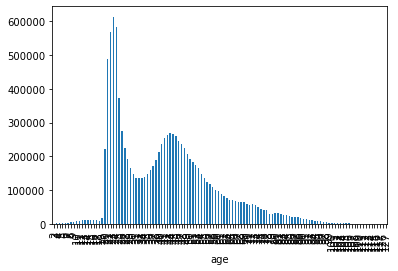

In [40]:
column_to_analize = 'age'
img_name = column_to_analize + 'or_box_plot.png'
fig = csv_clean.groupby(column_to_analize).size().plot(kind='bar').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

In [21]:
df_age_trunc = csv_clean[csv_clean['age'] < 100]

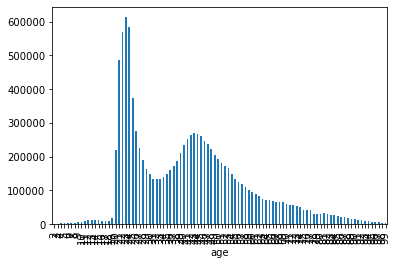

In [43]:
column_to_analize = 'age'
img_name = column_to_analize + 'trunc_box_plot.png'
fig = df_age_trunc.groupby(column_to_analize).size().plot(kind='bar').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_age_trunc)

In [45]:
outputs = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

y = df_age_trunc[outputs]
x = df_age_trunc.drop(columns=outputs)

In [46]:
y_unid = y.apply(lambda x: x.argmax(), axis=1).values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y_unid, test_size=0.33, random_state=42)

In [48]:
clf = HistGradientBoostingClassifier().fit(X_train, y_train)


In [49]:
clf.score(X_train, y_train)

0.7289985736259739

In [ ]:
mlflow.log_param('Model','Hist Gradient Boosting Classifier')
mlflow.log_param('Score',clf.score(X_train, y_train_unidemesional))


<h2>Neural Network</h2>

In [52]:
from sklearn.neural_network import MLPClassifier



clf = MLPClassifier(solver='adam', alpha=1e-5,
        hidden_layer_sizes=(125,2), random_state=1,
        learning_rate_init = 0.001,
        early_stopping=True)


mlflow.log_param('Hidden Layer Size','125,2')
mlflow.log_param('Learning Rate','0.001')




'0.001'

Handler NaN values

In [43]:
df_without_nan = df_age_trunc.dropna()

KeyboardInterrupt: 

In [24]:
df_age_trunc.shape

(10839510, 33)

In [56]:
df_without_nan.shape

(10782773, 33)

In [25]:
y_nan = df_without_nan[outputs]
x_nan = df_without_nan.drop(columns=outputs)

In [26]:
X_train_not_nan, X_test_not_nan, y_train_not_nan, y_test_not_nan = train_test_split(x_nan, y_nan, test_size=0.33, random_state=42)


In [53]:
clf.fit(X_train_not_nan,y_train_not_nan)

c:\ProgramData\Anaconda3\envs\datamining\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\datamining\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\datamining\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\datamining\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\datamining\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\

MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(125, 2),
              random_state=1)

In [45]:
clf.score(X_test_not_nan, y_test_not_nan)

0.4332465132382846

In [54]:
mlflow.log_param('Model','MLPClassifier')
mlflow.log_param('Score',clf.score(X_test_not_nan, y_test_not_nan))


0.4332465132382846

In [55]:
mlflow.end_run()